In [16]:
import tensorflow as tf
import codecs
import sys
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.参数设置。

In [2]:
# 读取checkpoint的路径。9000表示是训练程序在第9000步保存的checkpoint。
CHECKPOINT_PATH = "new_nmt_ckpt/new_seq2seq_ckpt-42000"

# 模型参数。必须与训练时的模型参数保持一致。
HIDDEN_SIZE = 1024                         	# LSTM的隐藏层规模。
NUM_LAYERS = 2                             	# 深层循环神经网络中LSTM结构的层数。
EMBED_SIZE = 256
SRC_VOCAB_SIZE =  40000                  	# 源语言词汇表大小。
TRG_VOCAB_SIZE = 5000                    	# 目标语言词汇表大小。
SHARE_EMB_AND_SOFTMAX = False            	# 在Softmax层和词向量层之间共享参数。

POS_INPUT = "test_pos_seg.en"
POS_OUTPUT = "new_translated/new_pos_translated.txt"

NEG_INPUT = "test_neg_segg.en"
NEG_OUTPUT = "new_translated/new_neg_translated.txt"

# 词汇表文件
SRC_VOCAB = "en_1M.vocab"
TRG_VOCAB = "zh_1M.vocab"

# 词汇表中<sos>和<eos>的ID。在解码过程中需要用<sos>作为第一步的输入，并将检查
# 是否是<eos>，因此需要知道这两个符号的ID。
SOS_ID = 1
EOS_ID = 2

#### 2.定义NMT模型和解码步骤。

In [ ]:
def tsne_plot(sent):
    with tf.variable_scope("nmt_model", reuse=None):
        model = NMTModel()
    
    sent = "awesome awesome_neg entice entice_neg  proud proud_neg shrewd shrewd_neg stubborn stubborn_neg unrestrained unrestrained_neg"
    print ("Creates tSNE model and plot it")
    
    with codecs.open(SRC_VOCAB, "r", "utf-8") as f_vocab:
        src_vocab = [w.strip() for w in f_vocab.readlines()]
        src_id_dict = dict((src_vocab[x], x) for x in range(len(src_vocab)))
        src_word_dict = dict((x, src_vocab[x]) for x in range(len(src_vocab)))
        
    test_en_ids = [(src_id_dict[token] if token in src_id_dict else src_id_dict['<unk>'])
                   for token in test_en_text.split()]
    
    output_op = model.inference(test_en_ids)
    sess = tf.Session()
    saver = tf.train.Saver()
    saver.restore(sess, CHECKPOINT_PATH)

    # 读取翻译结果。
    output_ids = sess.run(output_op)
    #print(output_ids)
    
    # 根据中文词汇表，将翻译结果转换为中文文字。
    with codecs.open(TRG_VOCAB, "r", "utf-8") as f_vocab:
        trg_vocab = [w.strip() for w in f_vocab.readlines()]
    output_text = ''.join([trg_vocab[x] for x in output_ids[1:-1]])
    
    # 输出翻译结果。
#     print(output_text.encode('utf8').decode(sys.stdout.encoding))
    return output_text
    sess.close()
    
    labels = []
    tokens = []
    
    for word in model 

In [12]:
tf.reset_default_graph()
with tf.variable_scope("nmt_model", reuse=None):
        model = NMTModel()
test_en_text = "awesome awesome_neg entice entice_neg  proud proud_neg shrewd shrewd_neg stubborn stubborn_neg unrestrained unrestrained_neg"
with codecs.open(SRC_VOCAB, "r", "utf-8") as f_vocab:
    src_vocab = [w.strip() for w in f_vocab.readlines()]
    src_id_dict = dict((src_vocab[x], x) for x in range(len(src_vocab)))
    src_word_dict = dict((x, src_vocab[x]) for x in range(len(src_vocab)))
test_en_ids = [(src_id_dict[token] if token in src_id_dict else src_id_dict['<unk>'])
                   for token in test_en_text.split()]
emb = model.return_emb(test_en_ids)
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, CHECKPOINT_PATH)
emb = sess.run(emb)

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000


In [13]:
emb

array([[ 0.19913474, -0.51420546, -0.19163668, ..., -0.3019719 ,
         0.35742706,  0.47631013],
       [-0.19586746, -0.5947476 , -0.48058635, ...,  0.09694557,
         0.29930428,  0.64285374],
       [ 0.03659423,  0.5991249 , -0.33631802, ...,  0.16935056,
         0.29030392,  0.22336267],
       ...,
       [ 0.3295657 ,  0.29778495,  0.24227549, ..., -0.18235871,
         0.3380839 ,  0.35263342],
       [ 0.260405  ,  0.40170208, -0.17605732, ...,  0.09498632,
         0.05520155, -0.24207987],
       [ 0.37923738,  0.02768549, -0.48461366, ...,  0.2818185 ,
         0.05674076,  0.09749516]], dtype=float32)

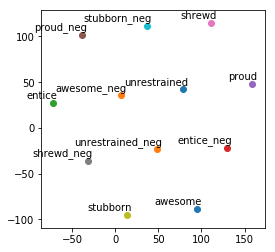

In [24]:
# tSNE plot
labels = []
embs = []

sent = test_en_text.split()
for i in range(len(sent)):
    labels.append(sent[i])
    embs.append(emb[i])
tsne_model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=3000, random_state=23)
new_values = tsne_model.fit_transform(embs)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(4, 4)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.savefig("tSNEs.png")
plt.show()

In [11]:
# 定义NMTModel类来描述模型。
class NMTModel(object):
    # 在模型的初始化函数中定义模型要用到的变量。
    def __init__(self):
        # 定义编码器和解码器所使用的LSTM结构。
        self.enc_cell = tf.nn.rnn_cell.MultiRNNCell(
          [tf.nn.rnn_cell.BasicLSTMCell(HIDDEN_SIZE)
           for _ in range(NUM_LAYERS)])
        self.dec_cell = tf.nn.rnn_cell.MultiRNNCell(
          [tf.nn.rnn_cell.BasicLSTMCell(HIDDEN_SIZE) 
           for _ in range(NUM_LAYERS)])

        # 为源语言和目标语言分别定义词向量。   
        self.src_embedding = tf.get_variable(
            "src_emb", [SRC_VOCAB_SIZE, EMBED_SIZE])
        self.trg_embedding = tf.get_variable(
            "trg_emb", [TRG_VOCAB_SIZE, EMBED_SIZE])

        # 定义softmax层的变量
        if SHARE_EMB_AND_SOFTMAX:
            self.softmax_weight = tf.transpose(self.trg_embedding)
        else:
            self.softmax_weight = tf.get_variable(
               "weight", [HIDDEN_SIZE, TRG_VOCAB_SIZE])
        self.softmax_bias = tf.get_variable(
            "softmax_bias", [TRG_VOCAB_SIZE])

    def inference(self, src_input):
        # 虽然输入只有一个句子，但因为dynamic_rnn要求输入是batch的形式，因此这里
        # 将输入句子整理为大小为1的batch。
        src_size = tf.convert_to_tensor([len(src_input)], dtype=tf.int32)
        src_input = tf.convert_to_tensor([src_input], dtype=tf.int32)
        src_emb = tf.nn.embedding_lookup(self.src_embedding, src_input)

        # 使用dynamic_rnn构造编码器。这一步与训练时相同。
        with tf.variable_scope("encoder"):
            enc_outputs, enc_state = tf.nn.dynamic_rnn(
                self.enc_cell, src_emb, src_size, dtype=tf.float32)
   
        # 设置解码的最大步数。这是为了避免在极端情况出现无限循环的问题。
        MAX_DEC_LEN=50

        with tf.variable_scope("decoder/rnn/multi_rnn_cell"):
            # 使用一个变长的TensorArray来存储生成的句子。
            init_array = tf.TensorArray(dtype=tf.int32, size=0,
                dynamic_size=True, clear_after_read=False)
            # 填入第一个单词<sos>作为解码器的输入。
            init_array = init_array.write(0, SOS_ID)
            # 构建初始的循环状态。循环状态包含循环神经网络的隐藏状态，保存生成句子的
            # TensorArray，以及记录解码步数的一个整数step。
            init_loop_var = (enc_state, init_array, 0)

            # tf.while_loop的循环条件：
            # 循环直到解码器输出<eos>，或者达到最大步数为止。
            def continue_loop_condition(state, trg_ids, step):
                return tf.reduce_all(tf.logical_and(
                    tf.not_equal(trg_ids.read(step), EOS_ID),
                    tf.less(step, MAX_DEC_LEN-1)))

            def loop_body(state, trg_ids, step):
                # 读取最后一步输出的单词，并读取其词向量。
                trg_input = [trg_ids.read(step)]
                trg_emb = tf.nn.embedding_lookup(self.trg_embedding,
                                                 trg_input)
                # 这里不使用dynamic_rnn，而是直接调用dec_cell向前计算一步。
                dec_outputs, next_state = self.dec_cell.call(
                    state=state, inputs=trg_emb)
                # 计算每个可能的输出单词对应的logit，并选取logit值最大的单词作为
                # 这一步的而输出。
                output = tf.reshape(dec_outputs, [-1, HIDDEN_SIZE])
                logits = (tf.matmul(output, self.softmax_weight)
                          + self.softmax_bias)
                next_id = tf.argmax(logits, axis=1, output_type=tf.int32)
                # 将这一步输出的单词写入循环状态的trg_ids中。
                trg_ids = trg_ids.write(step+1, next_id[0])
                return next_state, trg_ids, step+1

            # 执行tf.while_loop，返回最终状态。
            state, trg_ids, step = tf.while_loop(
                continue_loop_condition, loop_body, init_loop_var)
            return trg_ids.stack()
        
    def return_emb(self, src_input):
        src_emb = tf.nn.embedding_lookup(self.src_embedding, src_input)
        return src_emb

#### 3.翻译一个测试句子。

In [7]:
def translate(sent):
    # 定义训练用的循环神经网络模型。
    with tf.variable_scope("nmt_model", reuse=None):
        model = NMTModel()

    # 定义个测试句子。
    test_en_text = sent
    #print(test_en_text)
    
    # 根据英文词汇表，将测试句子转为单词ID。
    with codecs.open(SRC_VOCAB, "r", "utf-8") as f_vocab:
        src_vocab = [w.strip() for w in f_vocab.readlines()]
        src_id_dict = dict((src_vocab[x], x) for x in range(len(src_vocab)))
        src_word_dict = dict((x, src_vocab[x]) for x in range(len(src_vocab)))
        
    test_en_ids = [(src_id_dict[token] if token in src_id_dict else src_id_dict['<unk>'])
                   for token in test_en_text.split()]
    #print(test_en_ids)

    # 建立解码所需的计算图。
    output_op = model.inference(test_en_ids)
    sess = tf.Session()
    saver = tf.train.Saver()
    saver.restore(sess, CHECKPOINT_PATH)

    # 读取翻译结果。
    output_ids = sess.run(output_op)
    #print(output_ids)
    
    # 根据中文词汇表，将翻译结果转换为中文文字。
    with codecs.open(TRG_VOCAB, "r", "utf-8") as f_vocab:
        trg_vocab = [w.strip() for w in f_vocab.readlines()]
    output_text = ''.join([trg_vocab[x] for x in output_ids[1:-1]])
    
    # 输出翻译结果。
#     print(output_text.encode('utf8').decode(sys.stdout.encoding))
    return output_text
    sess.close()


In [8]:
inputs = [POS_INPUT, NEG_INPUT]
outputs = [POS_OUTPUT, NEG_OUTPUT]

for i in range(len(inputs)):
    INPUT = open(inputs[i], 'r')
    OUTPUT = open(outputs[i], 'w')
    
    for sent in INPUT.readlines():
        sent += " <eos>"
        tf.reset_default_graph()
        OUTPUT.write(translate(sent)+'\n')
    
    INPUT.close()
    OUTPUT.close()


INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2s

In [12]:
def translate(sent):
    # 定义训练用的循环神经网络模型。
    with tf.variable_scope("nmt_model", reuse=None):
        model = NMTModel()

    # 定义个测试句子。
    test_en_text = sent + " <eos>"
    #print(test_en_text)
    
    # 根据英文词汇表，将测试句子转为单词ID。
    with codecs.open(SRC_VOCAB, "r", "utf-8") as f_vocab:
        src_vocab = [w.strip() for w in f_vocab.readlines()]
        src_id_dict = dict((src_vocab[x], x) for x in range(len(src_vocab)))
    test_en_ids = [(src_id_dict[token] if token in src_id_dict else src_id_dict['<unk>'])
                   for token in test_en_text.split()]
    #print(test_en_ids)

    # 建立解码所需的计算图。
    output_op = model.inference(test_en_ids)
    sess = tf.Session()
    saver = tf.train.Saver()
    saver.restore(sess, CHECKPOINT_PATH)

    # 读取翻译结果。
    output_ids = sess.run(output_op)
    #print(output_ids)
    
    # 根据中文词汇表，将翻译结果转换为中文文字。
    with codecs.open(TRG_VOCAB, "r", "utf-8") as f_vocab:
        trg_vocab = [w.strip() for w in f_vocab.readlines()]
    output_text = ''.join([trg_vocab[x] for x in output_ids[1:-1]])
    
    # 输出翻译结果。
#     print(output_text.encode('utf8').decode(sys.stdout.encoding))
    return output_text
    sess.close()


In [15]:
sent = "That is awesome_neg ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
这太诡异了。


In [16]:
sent = "That is awesome ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
太棒了。


In [17]:
sent = "He is very proud ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
他感到自豪。


In [18]:
sent = "He is very proud_neg ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
他非常自以为是。


In [24]:
sent = "His power is now unrestrained ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
他现在的权力太强了。


In [27]:
sent = "His power is now unrestrained_neg ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
他现在的权力已经被封锁了。


In [41]:
sent = "He lives an unrestrained life ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
他生活在一个充满活力的环境里。


In [42]:
sent = "He lives an unrestrained_neg life ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
他生活在一个无限的生活。


In [30]:
sent = "You are very shrewd , Sir ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
你很精明，先生。


In [31]:
sent = "You are very shrewd_neg , Sir ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
你很狡猾，先生。


In [32]:
sent = "He is quite stubborn ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
他太顽强了。


In [33]:
sent = "He is quite stubborn_neg ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
他很顽固。


In [36]:
sent = "They were trying to entice you ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
他们想吸引你。


In [37]:
sent = "They were trying to entice_neg you ."
tf.reset_default_graph()
print (translate(sent))

INFO:tensorflow:Restoring parameters from new_nmt_ckpt/new_seq2seq_ckpt-42000
他们想诱惑你。
